<a href="https://colab.research.google.com/github/LanqingDu/UnstructuredDataAnalytics/blob/main/04_Text_Intro.ipynb" target="_blank">
<img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# **Getting Started with Text Analysis**



> **Instructor:** Dr. Lanqing Du  
> **Acknowledgement:** This notebook referenced to R user guide content, Machine Learning resoures, and the content created by Prof.Timothy E. Carone.  
> **Objective:** Introduction to Text Mining using R.  
> **Instructions:** You can preview the **Table of Contents** from the side bar.

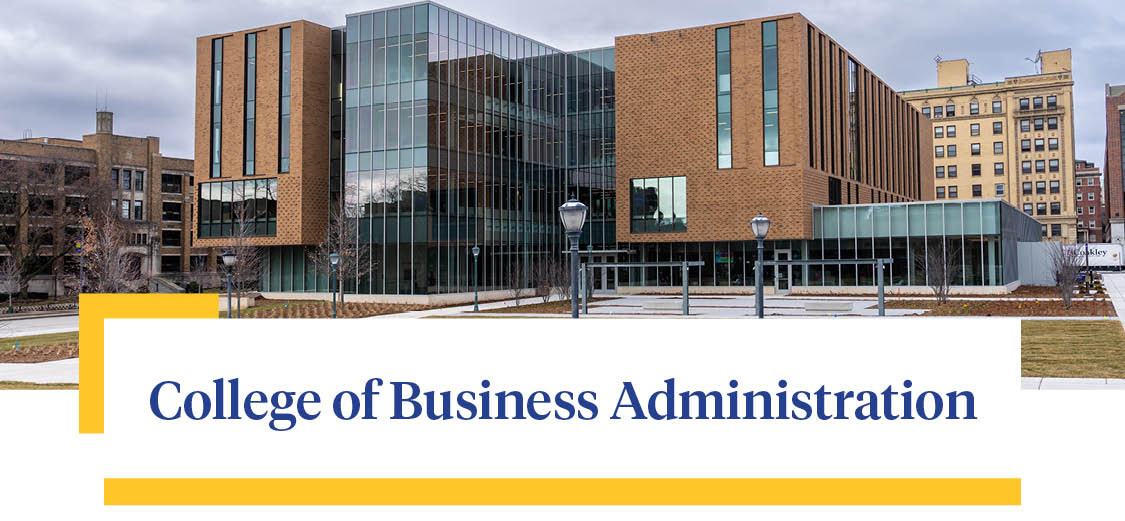
---

## [1. Intro](#intro)


Introduction to the text mining workflow overview.

## [2. Objective](#obj)

This tutorial utilizes the dataset available through the [harrypotter package](https://github.com/bradleyboehmke/harrypotter).

We begin our introduction to text mining by replicating the work of Bradley Boehmke. The following tasks will guide our workflow:

1. Install and load the necessary libraries to access the dataset and predefined functions.
2. Explore the dataset and review the available functions.
3. Preprocess the text by converting it into a structured format such as a data frame or tibble (text tidying).
4. Perform basic operations, starting with word frequency analysis and visualization.



## [3. Replication](#pract1)

### 3.1. Load the library and the data

In [1]:
# ================================================
# Step 1: Download and include the library
# ================================================

# install.packages("devtools")

devtools::install_github("bradleyboehmke/harrypotter")
library(harrypotter)

── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpvmhcIb/remotes911574116c/bradleyboehmke-harrypotter-51f7146/DESCRIPTION’ ... OK
* preparing ‘harrypotter’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘harrypotter_0.1.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
# ================================================
# Step 2: Include other required libraries
# ================================================

install.packages("tidyverse")
install.packages("tidytext")

library(tidyverse)      # data manipulation & plotting
library(stringr)        # text cleaning and regular expressions
library(tidytext)       # provides additional text mining functions
library(harrypotter)    # provides the first seven novels of the Harry Potter series

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SnowballC’, ‘janeaustenr’, ‘tokenizers’


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.1     ✔ stringr   1.5.2
✔ ggplot2   4.0.0     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


**Preview The Data Set:**

This package provides access to the full texts of the first seven Harry Potter books. The UTF-8 plain text for each novel was sourced from [Read Vampire Books](https://github.com/bradleyboehmke/harrypotter/blob/master/www.readbooksvampire.com), processed a bit, and is ready for text analysis. Each text is in a character vector with each element representing a single chapter. The package contains:

- `philosophers_stone`: Harry Potter and the Philosophers Stone, published in 1997

- `chamber_of_secrets`: Harry Potter and the Chamber of Secrets, published in 1998

- `prisoner_of_azkaban`: Harry Potter and the Prisoner of Azkaban, published in 1999

- `goblet_of_fire`: Harry Potter and the Goblet of Fire, published in 2000

- `order_of_the_phoenix`: Harry Potter and the Order of the Phoenix, published in 2003

- `half_blood_prince`: Harry Potter and the Half-Blood Prince, published in 2005

- `deathly_hallows`: Harry Potter and the Deathly Hallows, published in 2007


Each text is in a character vector with each element representing a single chapter.

In [ ]:
# ================================================
# Step 3: Preview the dataset
# ================================================

philosophers_stone[1:2]

### 3.2 Text tidying

In text mining, raw text is messy: it’s usually paragraphs or documents.

* We need it in a tidy format (one token per row, with columns describing metadata like book, chapter, etc.).

* This structure makes it easier to:
  * Count words
  * Join with sentiment lexicons
  * Aggregate results by document or chapter
  * Visualize word frequencies and sentiment

* So tidying = transforming raw text into a clean, analyzable data frame.


Note: Tibbles are data frames that are lazy and surly: they do less (i.e. they don't change variable names or types, and don't do partial matching) and complain more (e.g. when a variable does not exist). This forces you to confront problems earlier, typically leading to cleaner, more expressive code




In [ ]:
# ================================================
# Step 4: Text tidying
# ================================================

# tibble(..., .rows = NULL, .name_repair = c("check_unique", "unique", "universal", "minimal"))
#   ... : column definitions in name = value form (e.g., id = 1:3, name = c("A","B","C")).
#   .rows : optional, predefines number of rows when no data is supplied.
#   .name_repair : optional, handles duplicate/invalid column names ("unique" makes them distinct).
#   return : a tibble (modern data frame) with specified columns and rows.
#   output : rows = length of data vectors (or .rows), columns = number of arguments passed.


# tibble(chapter = seq_along(philosophers_stone), text = philosophers_stone)
#   chapter: assigns sequential numbers (1, 2, 3, …) to each text element.
#   text: stores the raw text content (here, the "philosophers_stone" text).
#   return: a tibble (modern data frame) with two columns: chapter and text.
#   data: structured dataset linking each chapter index to its text.
#   output: a tidy tibble with rows = number of text elements, columns = 2 (chapter, text).

# seq_along(x)
#   x      : an object (usually a vector, list, or similar).
#   return : an integer sequence from 1 to length(x).
#   output : integer vector c(1, 2, ..., length(x)); length 0 if x is empty.


text_tb <- tibble(chapter = seq_along(philosophers_stone),
                  text = philosophers_stone)
text_tb
colnames(text_tb)

In [ ]:
# ================================================
# Step 4 -1: Unnest text
# ================================================

# unnest_tokens(tbl, output, input, token = "word", ...)
#
#   tbl    : The input data frame or tibble (passed implicitly via %>% as text_tb).
#   output : Name of the new column to store the individual tokens (here, "word").
#   input  : The source column containing text to be tokenized (here, "text").
#   token  : The unit of tokenization; defaults to "word" if not specified.
#   ...    : Additional options (e.g., n=2 for ngrams).
#
#   Function: Converts the data structure from one row per document to one row per token (word).
#   Returns : A tibble where each row is one token, with new columns from the original data.


# object %>% function(arg1, arg2, ...)
#
#   object : The data or value on the left.
#   function: The function on the right.
#   arg1, ...: The remaining arguments to the function.
#
#   Function: Takes the object and passes it as the first argument to the function on the right.
#   Returns : The result of the right-hand function.
#
#   Equivalent to function(object, arg1, arg2, ...)

text_tb %>% unnest_tokens(word, text)
# unnest_tokens(text_tb, word, text)
colnames(text_tb)

In [ ]:
# ================================================
# Step 4 - 2: Unnest text with control flow
# ================================================

## with control flow: iteratively creates tokens

# c(..., recursive = FALSE)
#   ...       : elements to combine (numeric, character, logical, etc.).
#   recursive : logical, if TRUE, recursively flattens lists into a vector (default FALSE).
#   return    : a vector containing all the combined elements.

titles <- c("Philosopher's Stone", "Chamber of Secrets", "Prisoner of Azkaban",
            "Goblet of Fire", "Order of the Phoenix", "Half-Blood Prince",
            "Deathly Hallows")

# list(..., recursive = FALSE)
#   ...       : elements to include in the list (vectors, data frames, other lists, etc.).
#   recursive : logical, if TRUE, flattens nested lists (default FALSE).
#   return    : a list containing each element as a separate component.

books <- list(philosophers_stone, chamber_of_secrets, prisoner_of_azkaban,
           goblet_of_fire, order_of_the_phoenix, half_blood_prince,
           deathly_hallows)

series <- tibble()


# mutate(data, ..., keep = "all", .before = NULL, .after = NULL)
#
#   data        : The input data frame or tibble. This is a required parameter.
#   ...         : New column definitions in name = value form. This is a required parameter.
#   keep        : Optional, specifies which original columns to keep. Default is "all".
#   before      : Optional, specifies where to place new columns relative to an existing column. Default is NULL.
#   after       : Optional, specifies where to place new columns relative to an existing column. Default is NULL.
#
#   Returns      : A data frame with the new or modified columns.
#   Output       : A tibble with the new column(s) added and existing ones preserved.



# select(data, ...)
#
#   data        : The input data frame or tibble. This is a required parameter.
#   ...          : Columns to keep, drop, or reorder. You can use bare column names (e.g., `col1`, `col2`), use `-col_name` to drop a column, `new_name = old_name` to rename, or use tidyselect helpers like `everything()` and `starts_with()`. This is a required parameter.
#
#   Returns      : A data frame containing only the selected columns.
#   Output       : A tibble with a subset or reordered version of the original columns.


# rbind(...)
#
#   ...          : Two or more data frames, matrices, or vectors to be combined by row. This is a required parameter. For data frames, column names must match for a clean bind.
#
#   Returns      : A single data frame or matrix.
#   Output       : A new data frame/matrix created by stacking the input objects vertically (row-by-row).
#
#   Note         : This function can be inefficient when used iteratively inside a loop with large data, as it re-allocates memory on each call. For better performance in such cases, it is advisable to store results in a list and then use a function like `dplyr::bind_rows()` or `do.call(rbind, ...)` once at the end.

for(i in seq_along(titles)) {
        clean <- tibble(chapter = seq_along(books[[i]]), text = books[[i]]) %>%
          unnest_tokens(word, text) %>%
          mutate(book = titles[i]) %>%
          select(book, everything())

        series <- rbind(series, clean)
}

colnames(series)

In [ ]:
series

In [ ]:
# factor(x, levels = ...)
#
#   x            : The input vector to be converted into a factor (e.g., a column of characters). This is a required parameter.
#   levels       : Optional. A character vector used to explicitly define the order of the factor's categories. If not provided, the default order is alphabetical.
#
#   Returns      : An R object of class "factor".
#   Output       : A vector where each unique item in `x` is mapped to an integer, with the category order determined by the `levels` argument.
#
#   Usage        : Crucial for controlling the order of categorical data in tables and visualizations. For example, it's used with `ggplot2` to set the order of items on an axis. The common idiom `levels = rev(titles)` is used to make the y-axis of a plot appear in a natural top-to-bottom order.


series$book <- factor(series$book, levels = rev(titles))

series

### 3.3 Word Frequency

In [ ]:
# ================================================
# Step 5: Preview word frequency
# ================================================

# count(x, ..., sort = FALSE)
#
#   x            : The input data frame or tibble. This is a required parameter.
#   ...          : The column(s) to group by before counting. In the example, this is `word`. This is a required parameter.
#   sort         : Optional. A logical (`TRUE`/`FALSE`) that, if `TRUE`, sorts the results in descending order of the counts. The default is `FALSE`.
#
#   Returns      : A tibble.
#   Output       : A new tibble showing the unique values from the specified column(s) along with a new column, `n`, that contains the frequency of each value.
#
#   Note         : This function is a convenient shortcut for the more verbose `group_by(...) %>% summarise(n = n())`.

series %>% count(word, sort = TRUE)
series

One thing you will notice is that a lot of the most common words are not very informative

>  (i.e. the, and, to, of, a, he, …)


These are considered stop words. Most of the time we want our text mining to identify words that provide context (i.e. harry, dumbledore, granger, afraid, etc.)

Thus, we can remove the stop words from our tibble with anti_join and the built-in stop_words data set provided by tidytext

Now we start to see characters and other nouns, verbs, and adjectives that we would expect to be common in this series

In [ ]:
# ================================================
# Step 6: Remove stop words
# ================================================



# anti_join(x, y, by = NULL)
#
#   x            : The left-hand data frame to be filtered (e.g., your tibble of words). This is a required parameter.
#   y            : The right-hand data frame containing the rows to filter out (e.g., the `stop_words` tibble). This is a required parameter.
#   by           : Optional. Specifies the column(s) to match on. If `NULL` (the default), it uses all column names common to both `x` and `y` (in this case, likely the "word" column).
#
#   Returns      : A tibble.
#   Output       : A new tibble containing only the rows from `x` that have no match in `y`.
#
#   Usage        : In text analysis, this is the standard method for removing a list of stop words from your dataset.



series %>%
        anti_join(stop_words) %>%
        count(word, sort = TRUE)

We can perform this same assessment but grouped by book or even each chapter within each book

In [ ]:

# group_by(.data, ...)
#
#   .data        : The input data frame or tibble. This is a required parameter.
#   ...          : The column(s) to group by (e.g., `book`). This is a required parameter.
#
#   Returns      : A grouped tibble (`grouped_df`). The data looks the same, but it contains grouping information for other functions to use.
#
#   Usage        : The cornerstone of summary operations. Any function after `group_by()` (like `summarise`, `mutate`, `count`) will operate independently on each group.



# top_n(x, n, wt = NULL)
#
#   x            : The input data frame or tibble. This is a required parameter.
#   n            : The number of rows to return. A positive number (e.g., 10) returns the top n; a negative number returns the bottom n.
#   wt           : Optional. The variable to use for ordering. When used after `count()`, it automatically uses the `n` column by default.
#
#   Returns      : A tibble.
#   Output       : A new tibble containing the top `n` rows. Because the incoming data was grouped by `book`, it returns the top 10 rows *for each book*.
#
#   Note         : `top_n()` is being superseded by `slice_max()` and `slice_min()` in newer versions of `dplyr`, which are recommended for new code.

series %>%
        anti_join(stop_words) %>%
        group_by(book) %>%
        count(word, sort = TRUE) %>%
        top_n(10)
# top 10 most common words in each book

### 3.4 Visualization

In [ ]:
# ================================================
# Step 7: Visualization for the top 10 most common words in each book
# ================================================



# ungroup(x, ...)
#
#   x            : The input data frame or tibble (in this case, a grouped tibble). This is a required parameter.
#
#   Returns      : A regular (ungrouped) tibble.
#
#   Usage        : It's good practice to ungroup after a summary operation. This prevents accidental group-wise calculations in later steps. Here, it ensures `mutate()` operates on the whole tibble.



# ggplot(data, mapping = aes(...))
#
#   data         : The data frame to be plotted (passed via the `%>%` pipe). Required.
#   mapping      : The aesthetic mappings set inside `aes()`. It links variables to visual elements like axes and colors. Required.
#
#   Usage        : This is the starting point of every ggplot. The `aes()` here maps the reordered words to the x-axis, the count `n` to the y-axis, and the `book` to the bar color.



# geom_bar(stat = "identity", ...)
#
#   stat         : The statistical transformation to use. By default, it's "count" (which counts rows). Setting it to "identity" tells ggplot to use the actual values from the data (the `n` column) for the bar heights.
#
#   Returns      : A plot layer that draws bars.



# facet_wrap(~ variable, scales = "free_y")
#
#   ~ variable   : A formula specifying the variable to split the plot by (here, `~ book`).
#   scales       : Controls axis scales across facets. `"free_y"` allows each subplot to have its own y-axis range, making individual word counts easier to compare.
#
#   Returns      : A plot specification for creating subplots.



# labs(x = ..., y = ..., title = ...)
#
#   ...          : A list of aesthetic-to-label mappings. Here, it sets the y-axis label to "Frequency" and effectively removes the x-axis label.
#
#   Returns      : A plot specification for labels.



# coord_flip()
#
#   Returns      : A plot specification that swaps the axes.
#
#   Usage        : It turns a vertical bar chart into a horizontal one, which is much easier to read when you have long labels like words.



# theme(...)
#
#   ...          : A list of theme elements to modify. `legend.position = "none"` removes the legend from the plot.
#
#   Returns      : A plot specification for theme elements.

series %>%
        anti_join(stop_words) %>%
        group_by(book) %>%
        count(word, sort = TRUE) %>%
        top_n(10) %>%
        ungroup() %>%
        mutate(book = factor(book, levels = titles), text_order = nrow(.):1) %>%
              ggplot(aes(reorder(word, text_order), n, fill = book)) +
              geom_bar(stat = "identity") +
              facet_wrap(~ book, scales = "free_y") +
              labs(x = "NULL", y = "Frequency") +
              coord_flip() +
              theme(legend.position="none")

We will calculate word frequencies across the entire Harry Potter series and within each book to identify significant deviations in usage at the book level compared to the series overall.

In [ ]:
# ================================================
# Step-8: Calculate the frequency within each novel and across all novels
# ================================================


# calculate percent of word use across all novels



# transmute(data, ...)
#
#   data        : The input data frame or tibble. This is a required parameter.
#   ...          : New column definitions in `name = value` form. This is a required parameter.
#
#   Returns      : A tibble.
#   Output       : A new tibble containing *only* the columns created or specified in the function call. All original columns not explicitly mentioned are dropped.
#
#   Note         : This function is a variant of `mutate()`. The key difference is that `mutate()` adds new columns to the existing data frame, while `transmute()` returns a new data frame with only the columns you've just created (and any existing ones you used to create them).
#
#   Usage        : The expression `transmute(word, all_words = n / sum(n))` calculates the proportion of each word relative to the total count (`sum(n)`), returning a new two-column tibble with just the `word` and its calculated `all_words` frequency.


potter_pct <- series %>%
        anti_join(stop_words) %>%
        count(word) %>%
        transmute(word, all_words = n / sum(n))


# calculate percent of word use within each novel



# left_join(x, y, by = NULL)
#
#   x            : The left-hand data frame (passed via the `%>%` pipe). This is a required parameter.
#   y            : The right-hand data frame to join (e.g., `potter_pct`). This is a required parameter.
#   by           : Optional. The column(s) to use for matching. If `NULL` (the default), it joins on all columns with a common name (likely "word" in this context).
#
#   Returns      : A tibble.
#   Output       : A new tibble containing all rows from `x` and all columns from both `x` and `y`. Where no match is found, the new columns from `y` will have `NA` values.
#
#   Usage        : Used to enrich your primary dataset with additional information from a secondary table.



# arrange(.data, ...)
#
#   .data        : The input data frame or tibble. This is a required parameter.
#   ...          : The column(s) to sort by. By default, sorting is in ascending order.
#
#   Returns      : A tibble with the same dimensions but with reordered rows.
#
#   Note         : The helper function `desc()` is used inside `arrange()` to specify sorting in descending order (from largest to smallest). The command `arrange(desc(book_words))` sorts the data to show the most frequent words at the top.

frequency <- series %>%
        anti_join(stop_words) %>%
        count(book, word) %>%
        mutate(book_words = n / sum(n)) %>%
        left_join(potter_pct) %>%
        arrange(desc(book_words)) %>%
        ungroup()

frequency

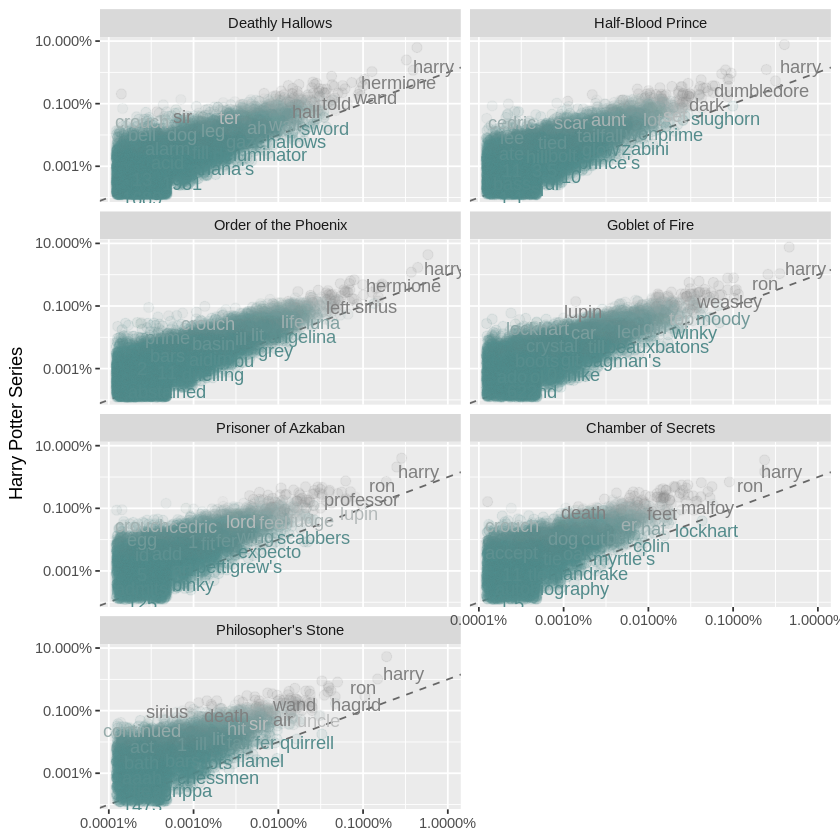

In [ ]:
# ================================================
# Step-9: Visualize the frequency within each novel and across all novels
# ================================================



# geom_abline(intercept = 0, slope = 1, color = "gray40", lty = 2)
#
#   intercept, slope : With defaults of 0 and 1, this creates a perfect diagonal y = x line.
#   color, lty   : Sets the line's color and type (lty = 2 is dashed).
#
#   Usage        : This line is a baseline for comparison. Words that fall on this line have the same frequency in a specific book as they do in the overall series.



# geom_jitter(alpha = 0.1, size = 2.5, width = 0.3, height = 0.3)
#
#   alpha        : Sets the transparency of the points, which helps visualize dense areas.
#   size         : Controls the size of the points.
#   width, height: Control the amount of random displacement (jitter) applied to each point's position.
#
#   Returns      : The primary scatter plot layer showing the data points.



# geom_text(aes(label = word), check_overlap = TRUE, vjust = 1.5)
#
#   aes(label=word): Maps the `word` column to the text label aesthetic.
#   check_overlap  : If `TRUE`, it avoids drawing labels that would overlap, cleaning up the plot.
#   vjust          : Vertically adjusts the position of the text relative to the point.
#
#   Usage        : Helps to identify which words correspond to interesting outlier points.



# scale_x_log10(labels = ...), scale_y_log10(labels = ...)
#
#   Purpose      : Transforms the x and y axes to a base-10 log scale. This is useful for data like word frequencies that span many orders of magnitude.
#   labels       : Formats the axis tick labels. `scales::percent_format()` shows them as percentages.




# scale_color_gradient(limits = ..., low = ..., high = ...)
#
#   Purpose      : Customizes the continuous color scale defined in `aes()`.
#   limits       : Sets the data range for the color gradient.
#   low, high    : Define the colors at the bottom and top ends of the scale, respectively.

ggplot(frequency, aes(x = book_words, y = all_words,
       color = abs(all_words - book_words))) +

       geom_abline(color = "gray40", lty = 2) +

       geom_jitter(alpha = 0.1, size = 2.5, width = 0.3, height = 0.3) +

       geom_text(aes(label = word), check_overlap = TRUE, vjust = 1.5) +

       scale_x_log10(labels = scales::percent_format()) +

       scale_y_log10(labels = scales::percent_format()) +

       scale_color_gradient(limits = c(0, 0.001), low = "darkslategray4", high = "gray75") +

       facet_wrap(~ book, ncol = 2) +

       theme(legend.position="none") +

       labs(y = "Harry Potter Series", x = NULL)

**Words near the line**

* Have similar frequencies across all the novels.

* Example: harry, ron, dumbledore—fairly common and consistently used across most books.

**Words far from the line**

* Appear more frequently in the set of texts than in another.

**Words above the line**

* Common across the entire series but less frequent in a specific book.

* Example: cedric in Half-Blood Prince—common across the series but not heavily used in this book.

**Words below the line**

* Common in a specific book but less frequent across the series.

* Example: quirrell in Philosopher’s Stone is frequent in this novel but uncommon across the series.

**Next step**

* Quantify similarity and difference in word frequencies using a correlation test.

* Measure how correlated word frequencies are between the entire series and each individual book.

In [ ]:
# ================================================
# Step-10: Calculate the correlation
# ================================================

# summarize(data, ...)
#
#   data        : The input data frame or tibble (in this case, grouped by book). This is a required parameter.
#   ...          : Name-value pairs of summary functions (e.g., `new_column = summary_function(old_column)`). This is a required parameter.
#
#   Returns      : A tibble.
#   Output       : A new, smaller tibble. It will have one row for each group (`book`) and columns for the grouping variable plus the new summary columns (`correlation`, `p_value`).
#
#   Usage        : It's the primary tool for creating summary tables from grouped data.

colnames(frequency)


frequency %>%
        group_by(book) %>%
        summarize(correlation = cor(book_words, all_words),
                  p_value = cor.test(book_words, all_words)$p.value)


The high correlations, all statistically significant (p < 0.0001), indicate that word frequencies are highly consistent across the entire Harry Potter series.